In [1]:
# dados
# https://data.brasil.io/dataset/covid19/_meta/list.html
# https://data.brasil.io/dataset/covid19/caso.csv.gz
# https://covid.saude.gov.br/


In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('caso.csv', sep = ',')

In [2]:
df_UF = df.loc[df['place_type']=='state']
df_UF_TNE = df_UF.query('state in ["PE", "CE", "PI", "BA", "RN", "AL","PB", "SE"]')

df_UF = df_UF.loc[df_UF['is_last']==True]
df_UF_TNE = df_UF_TNE.loc[df['is_last']==True]
df_UF_TNE.sort_values(by = ['confirmed'], ascending = False, inplace=True)

In [3]:
df_UF_TNE.head(8)

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
104595,2020-05-26,CE,NaN,state,37021,2603,72,True,9132078.0,23.0,405.39514,0.0703
69633,2020-05-27,PE,NaN,state,29919,2468,77,True,9557071.0,26.0,313.05617,0.0825
112395,2020-05-26,BA,NaN,state,14566,495,80,True,14873064.0,29.0,97.93544,0.0340
65767,2020-05-26,PB,NaN,state,8919,286,76,True,4018127.0,25.0,221.96909,0.0321
122828,2020-05-27,AL,NaN,state,7580,368,78,True,3337357.0,27.0,227.12584,0.0485
41190,2020-05-26,RN,NaN,state,5630,242,65,True,3506853.0,24.0,160.54280,0.0430
0,2020-05-25,SE,NaN,state,5448,103,62,True,2298696.0,28.0,237.00394,0.0189
62137,2020-05-27,PI,NaN,state,4243,138,69,True,3273227.0,22.0,129.62743,0.0325


In [4]:
df_Cidades = df.loc[df['place_type']=='city']
df_Cidades_atual = df_Cidades.loc[df_Cidades['is_last']==True]
df_Cidades_atual.sort_values(by = ['confirmed'], ascending = False, inplace=True)

In [5]:

df_Cidades_atual.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
37849,2020-05-27,SP,São Paulo,city,49264,3826,84,True,12252023.0,3550308.0,402.08870,0.0777
48203,2020-05-27,RJ,Rio de Janeiro,city,24750,3135,75,True,6718903.0,3304557.0,368.36370,0.1267
106862,2020-05-26,CE,Fortaleza,city,20789,1769,71,True,2669342.0,2304400.0,778.80616,0.0851
121826,2020-05-24,AM,Manaus,city,13881,1182,69,True,2182763.0,1302603.0,635.93711,0.0852
74386,2020-05-27,PE,Recife,city,13712,902,74,True,1645727.0,2611606.0,833.18801,0.0658


In [6]:
df_Cidades_atual_TNE = df_Cidades_atual.query('state in ["PE", "CE", "PI", "BA", "RN", "AL","PB", "SE"]')

In [7]:
df_cidades_unicas_TNE = df_Cidades_atual_TNE.loc[df_Cidades_atual_TNE['confirmed']>0]
df_cidades_unicas_TNE.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
106862,2020-05-26,CE,Fortaleza,city,20789,1769,71,True,2669342.0,2304400.0,778.80616,0.0851
74386,2020-05-27,PE,Recife,city,13712,902,74,True,1645727.0,2611606.0,833.18801,0.0658
118842,2020-05-26,BA,Salvador,city,9094,328,74,True,2872347.0,2927408.0,316.60520,0.0361
123947,2020-05-27,AL,Maceió,city,4358,230,78,True,1018948.0,2704302.0,427.69602,0.0528
105,2020-05-25,SE,Aracaju,city,3239,48,62,True,657013.0,2800308.0,492.98872,0.0148


---------------------
# Grafico


In [10]:
df = df[['date','place_type','confirmed','deaths']]
df = df.loc[df['place_type']=='state']
df.drop(['place_type'], axis =1, inplace = True)
df= df.groupby(['date']).sum()

In [14]:
df = df[df.index > '2020-03-15']
df = df[df.index < '2020-05-24']

#df = df[df.index != '2020-05-19']

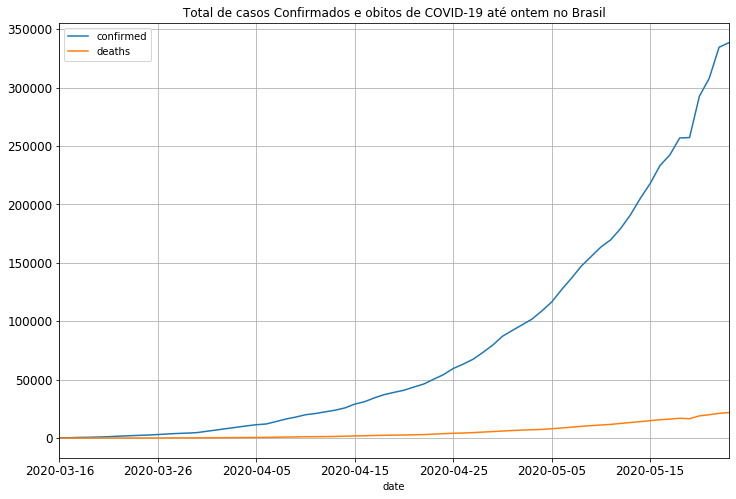

In [15]:
df.plot(y=['confirmed', 'deaths'], figsize=(12,8), use_index=True, title='Total de casos Confirmados e obitos de COVID-19 até ontem no Brasil', grid = True, legend=True, fontsize=12, kind='line')

# Função Logistica:

# $$f(x, a, b, c) = \frac{C}{(1 + e^{-(x-b)/a)})} $$

* a - Velocidade de infecção
* b - Dia onde ocorrerá o pico de infecção
* c - Total de pessoas infectadas ao final da pandemia

In [16]:
def funcao(x,a,b,c):
     #tput = a*(trafego**4) + b*(trafego**3) + c*(trafego**2) + d*(trafego) + e
     saida = (a * np.exp(x*b)) + c
     return saida

def fun_logistica(x,a,b,c):
     saida = c / (1 + np.exp(-( (x-b) /a )) )
     return saida

df['x'] = np.arange(len(df))

In [17]:
df.tail()

,confirmed,deaths,x
date,,,
2020-05-19,257214,16519,64
2020-05-20,292556,18994,65
2020-05-21,307955,19955,66
2020-05-22,334557,21148,67
2020-05-23,338441,21799,68


In [18]:
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
xdata1 = df['x']
ydata1 = df['confirmed']


xdata2 = df['x']
ydata2 = df['deaths']

popt1, pcov1 = curve_fit(fun_logistica, xdata1, ydata1, p0=[4,60,20000])
fit1 = curve_fit(fun_logistica,xdata1,ydata1,p0=[5,100,20000])
error1 = [np.sqrt(fit1[1][i][i]) for i in [0,1,2]]

popt2, pcov2 = curve_fit(fun_logistica, xdata2, ydata2, p0=[1,10,2000])
fit2 = curve_fit(fun_logistica, xdata2, ydata2, p0=[1,10,2000])


In [19]:
a1 = fit1[0][0]
b1 = fit1[0][1]
c1 = fit1[0][2]

sol1 = int(fsolve(lambda x : fun_logistica(x,a1,b1,c1) - int(c1),b1))

In [20]:
# Final do periodo de infecção
import datetime

start_date = df.index.min()
date_1 = datetime.datetime.strptime(start_date, "%Y-%m-%d")
end_date = date_1 + datetime.timedelta(days=sol1)

fim_contaminacao = date_1 + datetime.timedelta(days=b1)


In [21]:
fim_contaminacao

datetime.datetime(2020, 5, 31, 5, 19, 47, 701368)

In [23]:
print('Total de casos Confirmados(Brasil): %5d' %(df_UF['confirmed'].sum()))
print('Total de Obitos(Brasil): %5d' %(df_UF['deaths'].sum()))
print('Taxa de óbitos(Brasil): %2.2f%%' %(100* (df_UF['deaths'].sum() / df_UF['confirmed'].sum())))
print('Já existem casos confirmados em %3d cidades da TNE' %(df_cidades_unicas_TNE.shape[0]))
print(60*'-')
print('         ESPERADO PARA HOJE(Acumulado)')
print(60*'-')
print('Total de casos Confirmados(Brasil): %5d' %(fun_logistica(df.shape[0]+1, *popt1)))
print('Total de Obitos(Brasil): %5d' %(fun_logistica(df.shape[0]+1, *popt2)))

print(60*'-')
print('Data estimada para o fim do período de infecção:',(end_date.strftime('%d/%m/%y')))
print('Projeção total de casos(Brasil): %5d' %(fun_logistica(df.shape[0]+1000, *popt1)))
print('Projeção total de Obitos(Brasil): %5d' %(fun_logistica(df.shape[0]+1000, *popt2)))
#print('Dia estimado para o pico da infecção:', (date_1 + datetime.timedelta(days=b1)).strftime('%d/%m'))


Total de casos Confirmados(Brasil): 404251
Total de Obitos(Brasil): 25312
Taxa de óbitos(Brasil): 6.26%
Já existem casos confirmados em 1253 cidades da TNE
------------------------------------------------------------
         ESPERADO PARA HOJE(Acumulado)
------------------------------------------------------------
Total de casos Confirmados(Brasil): 372598
Total de Obitos(Brasil): 22959
------------------------------------------------------------
Data estimada para o fim do período de infecção: 09/03/21
Projeção total de casos(Brasil): 970188
Projeção total de Obitos(Brasil): 38245


### 03/04 - Data estimada foi 25/05
### 04/04 - Data estimada foi 11/06
### 06/04 - Data estimada foi 22/05
### 07/04 - Data estimada foi 31/05
### 08/04 - Data estimada foi 26/05
### 09/04 - Data estimada foi 03/06
### 12/04 - DAta estimada foi 10/06
### 13/04 - Data estimada foi 10/06
### 14/04 - Data estimada foi 07/06
### 17/04 - Data estimada foi 30/06
### 20/04 - Data estimada foi 06/07
### 17/04 - Data estimada foi 17/07
### 28/04 - Data estimada foi 01/08
### 05/05 - Data estimada foi 30/08
### 19/05 - Data estimada foi 14/11

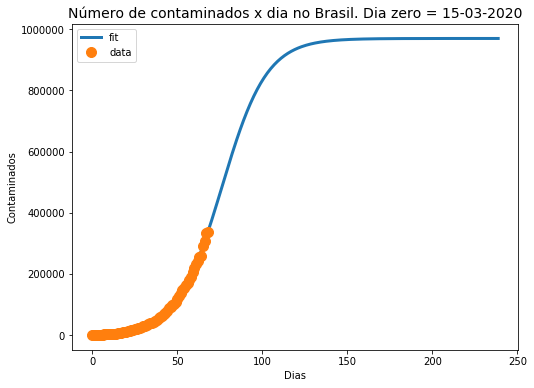

In [31]:
import matplotlib.pyplot as plt 

x = np.linspace(0, sol1-sol1/3, sol1)
#x = x/max(x)
plt.figure(figsize=(8,6))
y = fun_logistica(x, *popt1)
plt.plot(x,y, linewidth=3.0, label='fit')
plt.plot(xdata1, ydata1, 'o', label='data', markersize=10)
plt.legend(loc='best')
plt.title('Número de contaminados x dia no Brasil. Dia zero = 15-03-2020', size = 14)
plt.ylabel('Contaminados')
plt.xlabel('Dias')
plt.show()

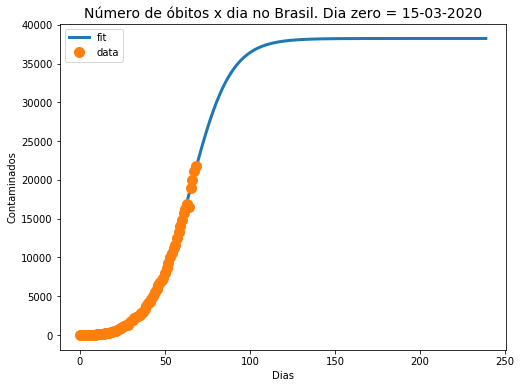

In [29]:
x = np.linspace(0, sol1-sol1/3, sol1)
#x = x/max(x)
plt.figure(figsize=(8,6))
y = fun_logistica(x, *popt2)
plt.plot(x,y, linewidth=3.0, label='fit',)
plt.plot(xdata2, ydata2, 'o', label='data', markersize=10)
plt.legend(loc='best')
plt.title('Número de óbitos x dia no Brasil. Dia zero = 15-03-2020', size = 14)
plt.ylabel('Contaminados')
plt.xlabel('Dias')
plt.show()

In [28]:
error1

[0.2678395697405794, 1.8961308416190246, 87684.15475623241]